    area  price
0   90.0   5.75
1   37.0   3.35
2   39.0   3.79
3  144.0  16.50
4  240.0  18.00
Data length:  340


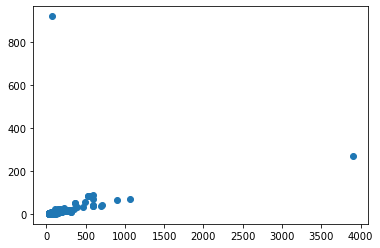

Linear Regression training model score:  0.7914002478931829


In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def getData():
    conn = psycopg2.connect(database="real_estate_data", user="postgres", password="361975Warcraft")
    # cur = conn.cursor()
    query = """
        SELECT area, price
        FROM bds_realestatedata 
        WHERE
            post_type = 'Bán đất' AND
            area IS NOT NULL AND
            price IS NOT NULL AND
            district = 'Gò Vấp';
    """
    # cur.execute(query)
    # data = cur.fetchall()
    data = pd.read_sql_query(query, con=conn)
    return data

data = getData()
print(data.head())
print("Data length: ", len(data))

# convert to array:
area = np.array(data['area'])
price = np.array(data['price'])
plt.scatter(area, price, marker='o')
plt.show()

if data is not None:
    # Selection few attributes
    attributes = list(
        [
            'area',
        ]
    )
    
    # Vector attributes of lands
    X = data[attributes]
    # Vector price of land
    Y = data['price']
    
    # Convert into arr:
    X = np.array(X)
    Y = np.array(Y)
    
    # plt.plot(Y)
    # plt.show()
    
    # Split data to training test and testing test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

def linearRegressionModel(X_train, Y_train, X_test, Y_test):
    model = linear_model.LinearRegression()

    # Training process
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    score_trained = model.score(X_test, Y_test)

    return score_trained

# def lassoRegressionModel(X_train, Y_train, X_test, Y_test):
#     model = linear_model.Lasso(alpha=1.0)

#     # Training process:
#     model.fit(X_train, Y_train)

#     # Evaluation the model:
#     score_trained = model.score(X_test, Y_test)
    
#     return score_trained

print("Linear Regression training model score: ", linearRegressionModel(X_train, Y_train, X_test, Y_test))
# print("Lasso Regression training model score: ", lassoRegressionModel(X_train, Y_train, X_test, Y_test))